参考: 
- [交叉熵在机器学习中的使用](https://blog.csdn.net/tsyccnh/article/details/79163834)
- wiki

In [1]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt


def show_function(data, func: Callable):
    fig, ax = plt.subplots(figsize=(3, 2.7), layout='constrained')
    ax.plot(data, func(data))

### 信息量

信息量的想法是，比较不可能发生的事情，当它发生了，会提供更多的信息。

$$I(x_0)=−\log_{2}{(P(x_0))} $$



In [8]:
def info(p: float):
    return - np.log2(p)

info(0.7), info(0.1)

(0.5145731728297583, 3.321928094887362)

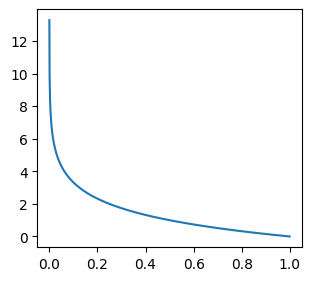

In [12]:
show_function(data=np.arange(0.0001, 1, 0.001), func=info)

### 信息熵 entropy

在信息论中，熵（英语：entropy，又称信息熵、信源熵、平均自信息量）是接收的每条消息中包含的信息的平均量。

这里的“消息”代表来自分布或数据流中的事件、样本或特征。（熵最好理解为不确定性的量度而不是确定性的量度，因为越随机的信源的熵越大。）来自信源的另一个特征是样本的概率分布。


In [14]:
def entropy(p: np.array):
    return -np.sum(p * np.log2(p))

data1=np.array([0.3, 0.4, 0.1, 0.2])
data2=np.array([0.5, 0.5])
entropy(data1), entropy(data2)

(1.8464393446710154, 1.0)

### 相对熵

相对熵又称KL散度,如果我们对于同一个随机变量 x 有**两个单独的概率分布 P(x) 和 Q(x)**，我们可以使用 KL 散度（Kullback-Leibler (KL) divergence）来衡量这<u>两个分布的差异</u>

DKL的值越小，表示q分布和p分布越接近

In the context of machine learning, DKL(P‖Q) is often called the information gain achieved if P is used instead of Q.

直观的理解就是如果用P来描述样本，那么就非常完美。而用Q来描述样本，虽然可以大致描述，但是不是那么的完美，信息量不足，需要额外的一些“信息增量”才能达到和P一样完美的描述。如果我们的Q通过反复训练，也能完美的描述样本，那么就不再需要额外的“信息增量”，Q等价于P。

$$D_{KL}(P||Q) = \displaystyle \sum_i P_i \log_2{\frac {P_i}{Q_i}} $$

KL散度仅当:
- 概率P和Q各自总和均为1
- 且对于任何i皆满足 Q(i)>0 及 P(i)>0时
才有定义

KL散度是两个概率分布P和Q差别的非对称性的度量。 KL散度是用来度量使用基于Q的分布来编码服从P的分布的样本所需的额外的平均比特数。


**典型情况下，P表示数据的真实分布，Q表示数据的理论分布、估计的模型分布、或P的近似分布。**

In [27]:
def relative_entropy(p: np.arange, q:np.arange):
    if np.sum(p) != 1 or np.sum(p) != 1 or p.shape != q.shape:
        return 'error'
    
    # 防止除以零或者计算 log(0) 的问题，可以加上一个小常数 epsilon
    epsilon = 1e-10
    p = np.clip(p, epsilon, 1)
    q = np.clip(q, epsilon, 1)
    
    return np.sum(p * np.log(p / q))


p=np.array([0.3, 0.4, 0.1, 0.2])
q=np.array([0.5, 0.4, 0.5, 0.5])
relative_entropy(p, q)

-0.4974496247480383

## 交叉熵 Cross entropy

在信息论中，基于相同事件测度的两个概率分布 `p`和`q`的交叉熵是指，当基于一个“非自然”（相对于“真实”分布`p`而言）的概率分布
`q`进行编码时，在事件集合中唯一标识一个事件所需要的平均比特数（bit）。

给定两个概率分布`p`和`q`, `p`相对于`q`的交叉熵定义为：
$$H(p, q) = H(p) + D_{KL}(p||q)$$

对于离散分布p, q, 则：
$$H(p, q) = -\sum_x p(x)log_2 {q(x)}$$


In [30]:
def cross_entropy(p: np.array, q: np.array):
    epsilon = 1e-10
    q = np.clip(q, epsilon, 1 - epsilon)
    return np.sum(p * np.log2(q))

p=np.array([0.3, 0.4, 0.1, 0.2])
q=np.array([0.5, 0.4, 0.5, 0.5])
cross_entropy(p, q)

-1.1287712379549448